# 🎯Objetivo do Projeto 

Desenvolver um modelo preditivo capaz de classificar nódulos mamários como benignos ou malignos, com base em características extraídas de exames de imagem, visando auxiliar o diagnóstico precoce do câncer de mama.

# 📖Bibliotecas

In [959]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

# 📂 Coleta

In [786]:
cancer = load_breast_cancer()

In [788]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target

In [790]:
df['diagnosis'] = df['diagnosis'].map({0: 'maligno', 1: 'benigno'})

In [994]:
# Salvando dataset

df.to_csv('breast_cancer_dataset.csv', index=False)

In [792]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,maligno


# 🎲 Divisão de Dados de Treino e Teste

In [795]:
# Features e target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Divisão com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,              # 80% treino, 20% teste
    stratify=y,                 # mantém proporção de benigno/maligno
    random_state=42             # garante reprodutibilidade
)

# Verificando as proporções
print("Proporção no conjunto original:")
print(y.value_counts(normalize=True), "\n")

print("Proporção no treino:")
print(y_train.value_counts(normalize=True), "\n")

print("Proporção no teste:")
print(y_test.value_counts(normalize=True))

Proporção no conjunto original:
diagnosis
benigno    0.627417
maligno    0.372583
Name: proportion, dtype: float64 

Proporção no treino:
diagnosis
benigno    0.626374
maligno    0.373626
Name: proportion, dtype: float64 

Proporção no teste:
diagnosis
benigno    0.631579
maligno    0.368421
Name: proportion, dtype: float64


# 🧹 Análise Exploratória e Limpeza dos Dados

In [798]:
# Verificando dados nulos

pd.DataFrame({'train': round(100*(X_train.isnull().sum()/X_train.count()), 2), 
              'test': round(100*(X_test.isnull().sum()/X_test.count()), 2)})

,train,test
mean radius,0.0,0.0
mean texture,0.0,0.0
mean perimeter,0.0,0.0
mean area,0.0,0.0
mean smoothness,0.0,0.0
mean compactness,0.0,0.0
mean concavity,0.0,0.0
mean concave points,0.0,0.0
mean symmetry,0.0,0.0
mean fractal dimension,0.0,0.0


In [800]:
# Verificando tipo dos dados

pd.DataFrame({'train': X_train.dtypes, 'test': X_test.dtypes})

,train,test
mean radius,float64,float64
mean texture,float64,float64
mean perimeter,float64,float64
mean area,float64,float64
mean smoothness,float64,float64
mean compactness,float64,float64
mean concavity,float64,float64
mean concave points,float64,float64
mean symmetry,float64,float64
mean fractal dimension,float64,float64


In [802]:
"""
Analisa visualmente e estatisticamente a relação entre uma variável numérica e a variável target.
"""

def analisar_variavel(df, variavel, target="diagnosis"):
    print(f"\n📈 Analisando variável: `{variavel}`")

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=target, y=variavel)
    plt.title(f"Boxplot de {variavel} por {target.capitalize()}")
    plt.show()

    # Cálculo de outliers com IQR
    Q1 = df[variavel].quantile(0.25)
    Q3 = df[variavel].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5 * IQR
    ls = Q3 + 1.5 * IQR

    # Criar flag de outlier
    outlier_col = f"{variavel.replace(' ', '_')}_outlier"
    df[outlier_col] = (df[variavel] < li) | (df[variavel] > ls)

    # Proporção entre diagnóstico e outlier
    proporcao = pd.crosstab(df[outlier_col], df[target], normalize="index")
    print(f"\n📊 Proporção entre diagnóstico por outlier em `{variavel}`:")
    print(proporcao)

    return df

## mean radius e relação com diagnosis


📈 Analisando variável: `mean radius`


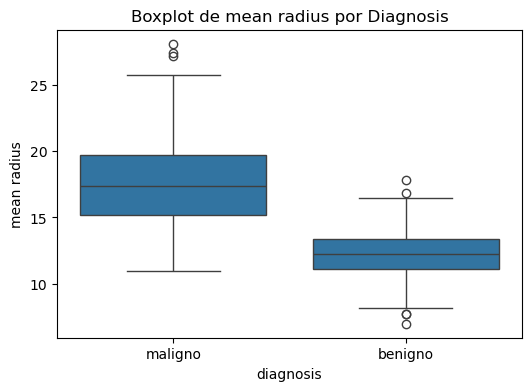


📊 Proporção entre diagnóstico por outlier em `mean radius`:
diagnosis             benigno   maligno
mean_radius_outlier                    
False                0.641892  0.358108
True                 0.000000  1.000000


In [805]:
train = analisar_variavel(train, "mean radius")

## mean texture e relação com diagnosis


📈 Analisando variável: `mean texture`


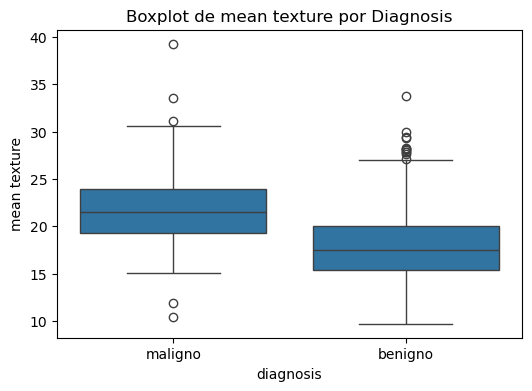


📊 Proporção entre diagnóstico por outlier em `mean texture`:
diagnosis              benigno   maligno
mean_texture_outlier                    
False                 0.631111  0.368889
True                  0.200000  0.800000


In [808]:
train = analisar_variavel(train, 'mean texture')

## mean perimeter e relação com diagnosis


📈 Analisando variável: `mean perimeter`


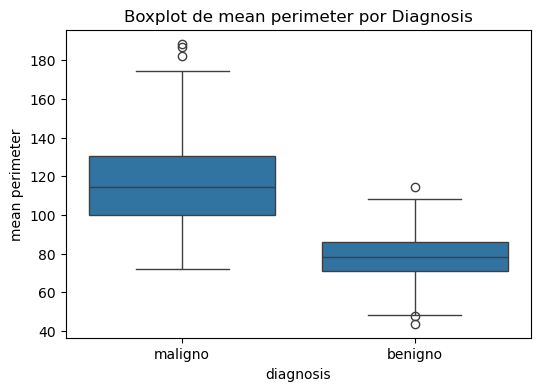


📊 Proporção entre diagnóstico por outlier em `mean perimeter`:
diagnosis                benigno   maligno
mean_perimeter_outlier                    
False                   0.643341  0.356659
True                    0.000000  1.000000


In [811]:
train = analisar_variavel(train, 'mean perimeter')

## mean area e relação com diagnosis


📈 Analisando variável: `mean area`


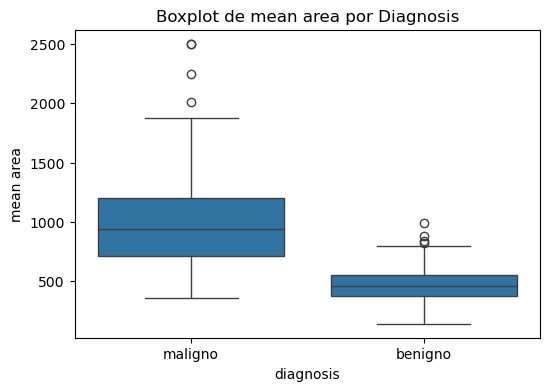


📊 Proporção entre diagnóstico por outlier em `mean area`:
diagnosis           benigno   maligno
mean_area_outlier                    
False              0.655172  0.344828
True               0.000000  1.000000


In [814]:
train = analisar_variavel(train, 'mean area')

## mean smoothness e relação com diagnosis


📈 Analisando variável: `mean smoothness`


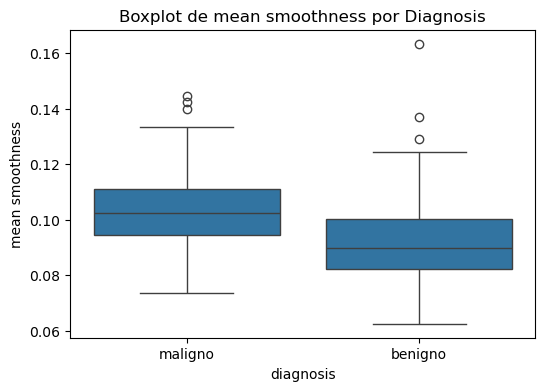


📊 Proporção entre diagnóstico por outlier em `mean smoothness`:
diagnosis                 benigno   maligno
mean_smoothness_outlier                    
False                    0.628889  0.371111
True                     0.400000  0.600000


In [817]:
train = analisar_variavel(train, 'mean smoothness')

## mean compactness e relação com diagnosis


📈 Analisando variável: `mean compactness`


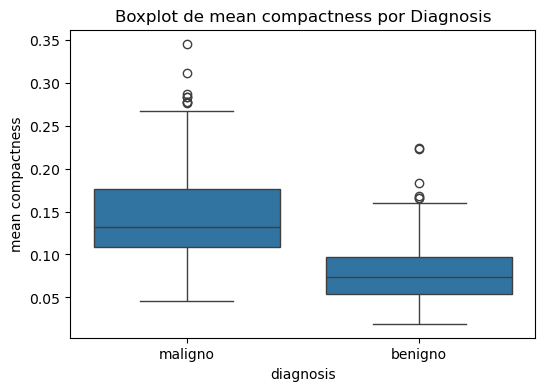


📊 Proporção entre diagnóstico por outlier em `mean compactness`:
diagnosis                  benigno   maligno
mean_compactness_outlier                    
False                     0.646259  0.353741
True                      0.000000  1.000000


In [820]:
train = analisar_variavel(train, 'mean compactness')

## mean concavity e relação com diagnosis


📈 Analisando variável: `mean concavity`


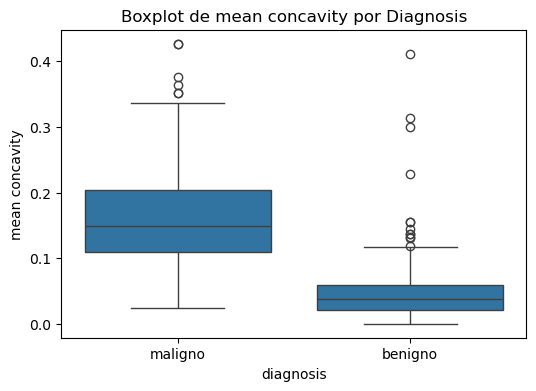


📊 Proporção entre diagnóstico por outlier em `mean concavity`:
diagnosis                benigno   maligno
mean_concavity_outlier                    
False                   0.643836  0.356164
True                    0.176471  0.823529


In [823]:
train = analisar_variavel(train, 'mean concavity')

## mean concave points e relação com diagnosis


📈 Analisando variável: `mean concave points`


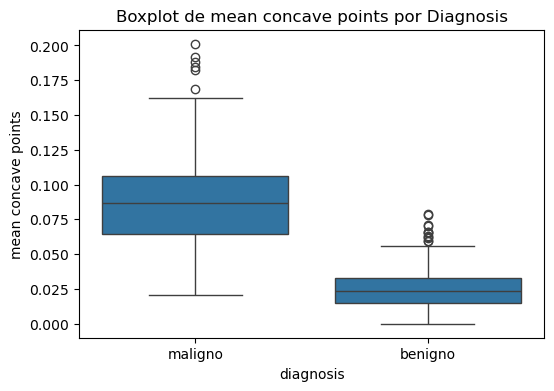


📊 Proporção entre diagnóstico por outlier em `mean concave points`:
diagnosis                     benigno   maligno
mean_concave_points_outlier                    
False                        0.639013  0.360987
True                         0.000000  1.000000


In [826]:
train = analisar_variavel(train, 'mean concave points')

## mean symmetry e relação com diagnosis


📈 Analisando variável: `mean symmetry`


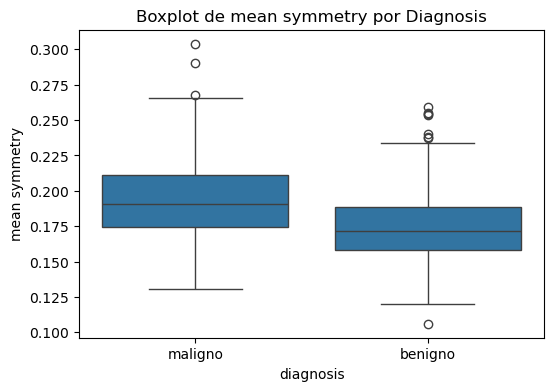


📊 Proporção entre diagnóstico por outlier em `mean symmetry`:
diagnosis               benigno   maligno
mean_symmetry_outlier                    
False                  0.633484  0.366516
True                   0.384615  0.615385


In [829]:
train = analisar_variavel(train, 'mean symmetry')

## mean fractal dimension e relação com diagnosis


📈 Analisando variável: `mean fractal dimension`


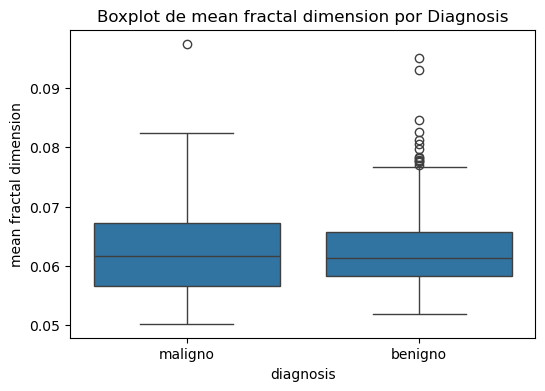


📊 Proporção entre diagnóstico por outlier em `mean fractal dimension`:
diagnosis                        benigno   maligno
mean_fractal_dimension_outlier                    
False                           0.627540  0.372460
True                            0.583333  0.416667


In [832]:
train = analisar_variavel(train, 'mean fractal dimension')

## radius error e relação com diagnosis


📈 Analisando variável: `radius error`


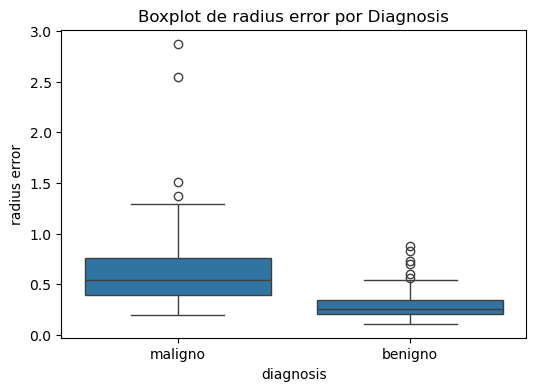


📊 Proporção entre diagnóstico por outlier em `radius error`:
diagnosis              benigno   maligno
radius_error_outlier                    
False                 0.669811  0.330189
True                  0.032258  0.967742


In [835]:
train = analisar_variavel(train, 'radius error')

## texture error e relação com diagnosis


📈 Analisando variável: `texture error`


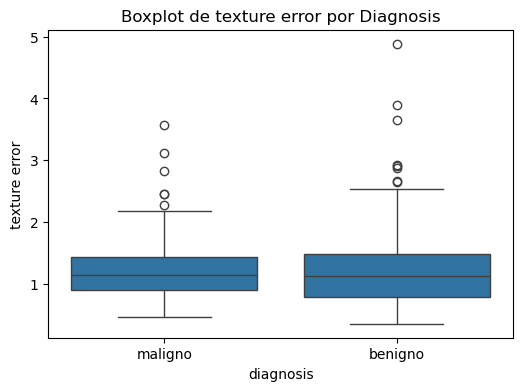


📊 Proporção entre diagnóstico por outlier em `texture error`:
diagnosis               benigno   maligno
texture_error_outlier                    
False                  0.625000  0.375000
True                   0.666667  0.333333


In [838]:
train = analisar_variavel(train, 'texture error')

## perimeter error e relação com diagnosis


📈 Analisando variável: `perimeter error`


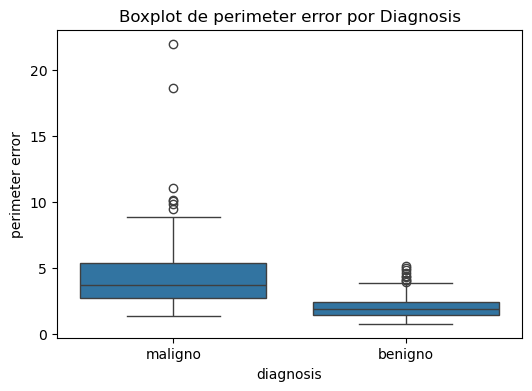


📊 Proporção entre diagnóstico por outlier em `perimeter error`:
diagnosis                benigno  maligno
perimeter_error_outlier                  
False                    0.67696  0.32304
True                     0.00000  1.00000


In [841]:
train = analisar_variavel(train, 'perimeter error')

## area error e relação com diagnosis


📈 Analisando variável: `area error`


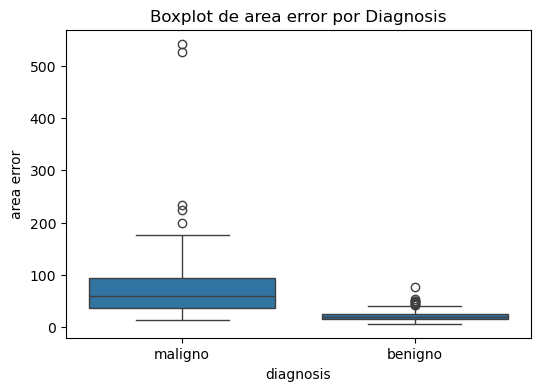


📊 Proporção entre diagnóstico por outlier em `area error`:
diagnosis            benigno   maligno
area_error_outlier                    
False               0.708955  0.291045
True                0.000000  1.000000


In [844]:
train = analisar_variavel(train, 'area error')

## smoothness error e relação com diagnosis


📈 Analisando variável: `smoothness error`


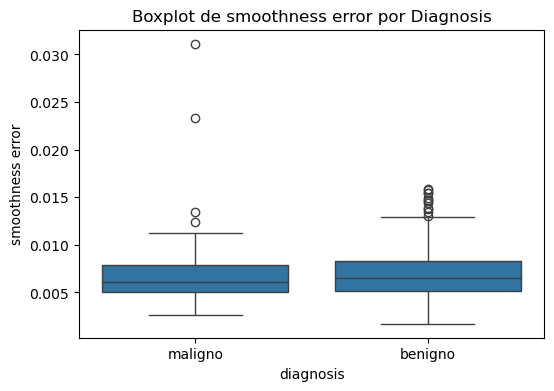


📊 Proporção entre diagnóstico por outlier em `smoothness error`:
diagnosis                  benigno   maligno
smoothness_error_outlier                    
False                     0.616092  0.383908
True                      0.850000  0.150000


In [847]:
train = analisar_variavel(train, "smoothness error")

## concavity error e relação com diagnosis


📈 Analisando variável: `concavity error`


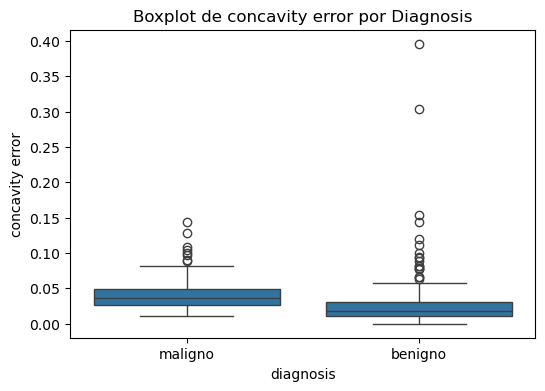


📊 Proporção entre diagnóstico por outlier em `concavity error`:
diagnosis                 benigno   maligno
concavity_error_outlier                    
False                    0.631090  0.368910
True                     0.541667  0.458333


In [850]:
train = analisar_variavel(train, 'concavity error')

## concave points error e relação com diagnosis


📈 Analisando variável: `concave points error`


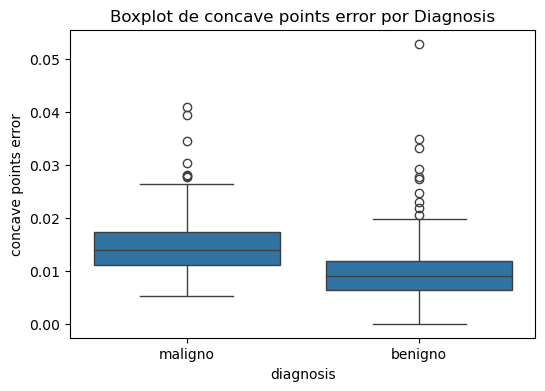


📊 Proporção entre diagnóstico por outlier em `concave points error`:
diagnosis                      benigno   maligno
concave_points_error_outlier                    
False                         0.636986  0.363014
True                          0.352941  0.647059


In [853]:
train = analisar_variavel(train, 'concave points error')

## symmetry error e relação com diagnosis


📈 Analisando variável: `symmetry error`


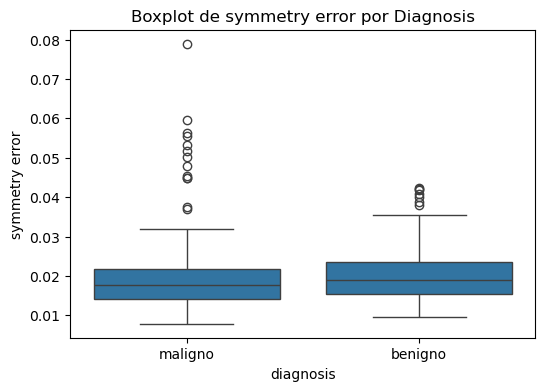


📊 Proporção entre diagnóstico por outlier em `symmetry error`:
diagnosis                benigno   maligno
symmetry_error_outlier                    
False                   0.637413  0.362587
True                    0.409091  0.590909


In [856]:
train = analisar_variavel(train, 'symmetry error')

## fractal dimension error e relação com diagnosis


📈 Analisando variável: `fractal dimension error`


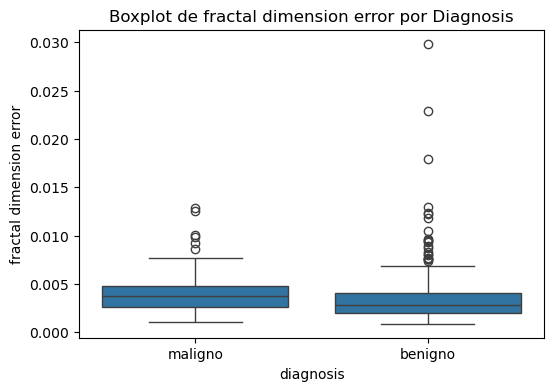


📊 Proporção entre diagnóstico por outlier em `fractal dimension error`:
diagnosis                        benigno  maligno
fractal_dimension_error_outlier                  
False                            0.62037  0.37963
True                             0.73913  0.26087


In [859]:
train = analisar_variavel(train, 'fractal dimension error')

## worst radius e relação com diagnosis


📈 Analisando variável: `worst radius`


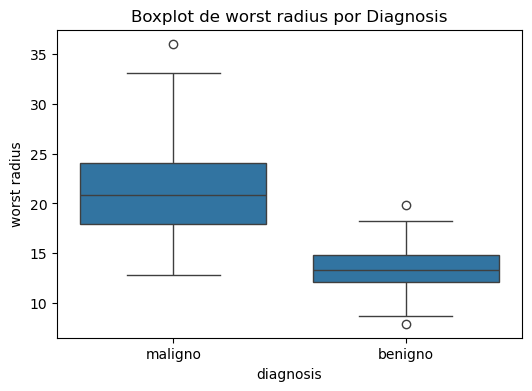


📊 Proporção entre diagnóstico por outlier em `worst radius`:
diagnosis              benigno   maligno
worst_radius_outlier                    
False                 0.640449  0.359551
True                  0.000000  1.000000


In [862]:
train = analisar_variavel(train, 'worst radius')

## worst texture e relação com diagnosis


📈 Analisando variável: `worst texture`


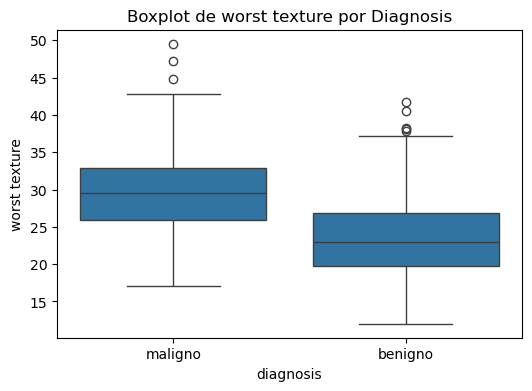


📊 Proporção entre diagnóstico por outlier em `worst texture`:
diagnosis               benigno   maligno
worst_texture_outlier                    
False                  0.630531  0.369469
True                   0.000000  1.000000


In [865]:
train = analisar_variavel(train, 'worst texture')

## worst perimeter e relação com diagnosis


📈 Analisando variável: `worst perimeter`


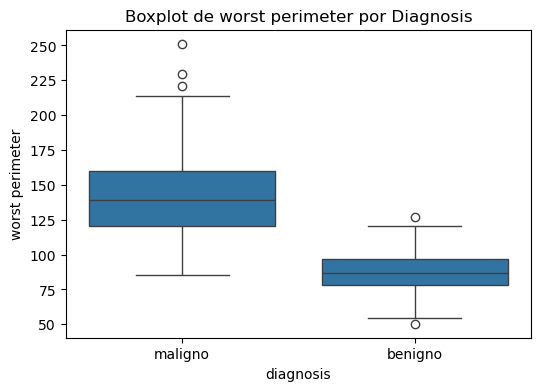


📊 Proporção entre diagnóstico por outlier em `worst perimeter`:
diagnosis                 benigno   maligno
worst_perimeter_outlier                    
False                    0.643341  0.356659
True                     0.000000  1.000000


In [868]:
train = analisar_variavel(train, 'worst perimeter')

## worst area e relação com diagnosis


📈 Analisando variável: `worst area`


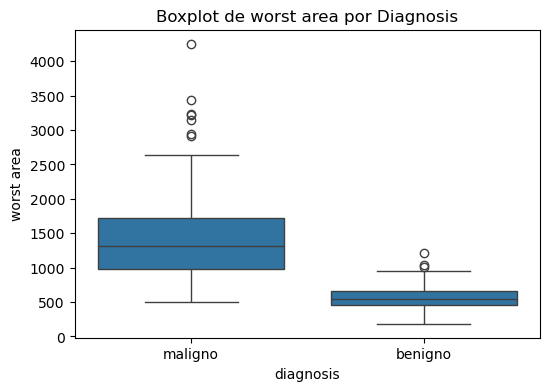


📊 Proporção entre diagnóstico por outlier em `worst area`:
diagnosis            benigno   maligno
worst_area_outlier                    
False               0.656682  0.343318
True                0.000000  1.000000


In [871]:
train = analisar_variavel(train, 'worst area')

## worst smoothness e relação com diagnosis


📈 Analisando variável: `worst smoothness`


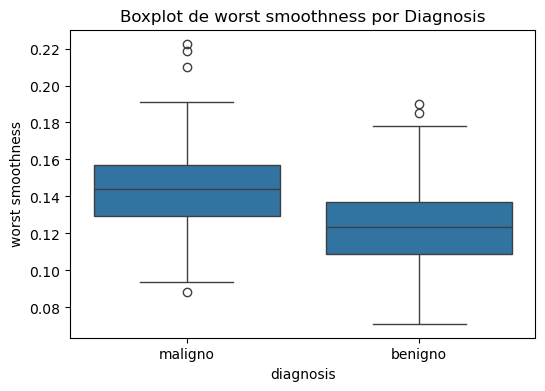


📊 Proporção entre diagnóstico por outlier em `worst smoothness`:
diagnosis                  benigno   maligno
worst_smoothness_outlier                    
False                     0.630531  0.369469
True                      0.000000  1.000000


In [874]:
train = analisar_variavel(train, 'worst smoothness')

## worst compactness e relação com diagnosis


📈 Analisando variável: `worst compactness`


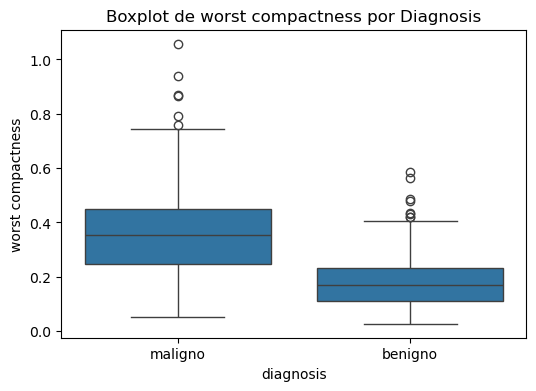


📊 Proporção entre diagnóstico por outlier em `worst compactness`:
diagnosis                   benigno   maligno
worst_compactness_outlier                    
False                      0.647727  0.352273
True                       0.000000  1.000000


In [877]:
train = analisar_variavel(train, 'worst compactness')

## worst concavity e relação com diagnosis


📈 Analisando variável: `worst concavity`


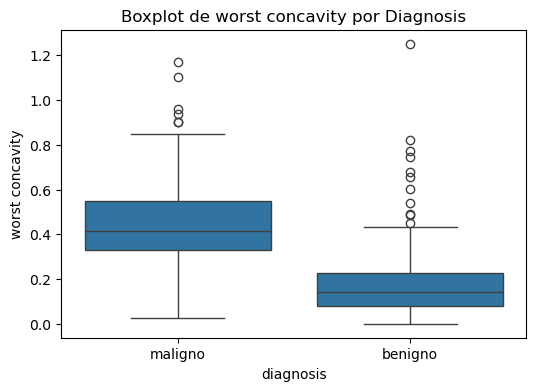


📊 Proporção entre diagnóstico por outlier em `worst concavity`:
diagnosis                 benigno   maligno
worst_concavity_outlier                    
False                    0.637387  0.362613
True                     0.181818  0.818182


In [880]:
train = analisar_variavel(train, 'worst concavity')

## worst concave points e relação com diagnosis


📈 Analisando variável: `worst concave points`


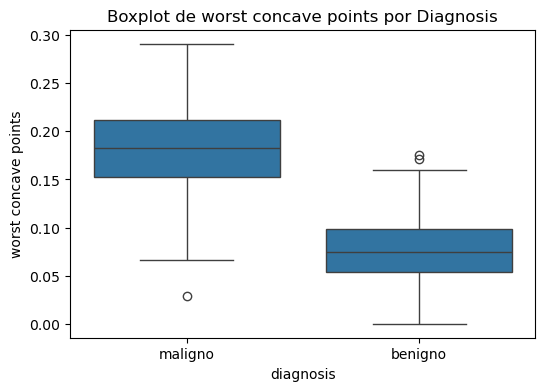


📊 Proporção entre diagnóstico por outlier em `worst concave points`:
diagnosis                      benigno   maligno
worst_concave_points_outlier                    
False                         0.626374  0.373626


In [883]:
train = analisar_variavel(train, 'worst concave points')

## worst symmetry e relação com diagnosis


📈 Analisando variável: `worst symmetry`


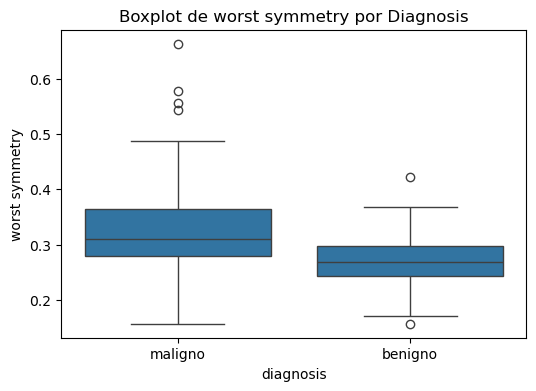


📊 Proporção entre diagnóstico por outlier em `worst symmetry`:
diagnosis                benigno   maligno
worst_symmetry_outlier                    
False                   0.652874  0.347126
True                    0.050000  0.950000


In [886]:
train = analisar_variavel(train, 'worst symmetry')

## worst fractal dimension e relação com diagnosis


📈 Analisando variável: `worst fractal dimension`


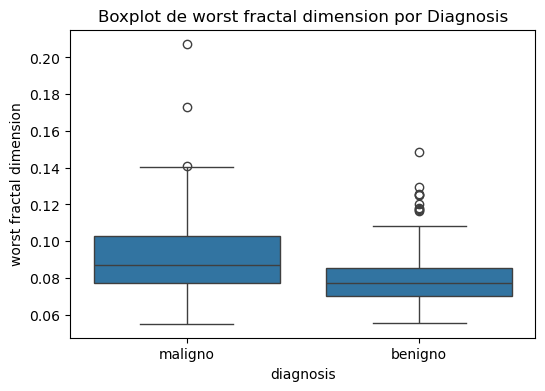


📊 Proporção entre diagnóstico por outlier em `worst fractal dimension`:
diagnosis                         benigno   maligno
worst_fractal_dimension_outlier                    
False                            0.640732  0.359268
True                             0.277778  0.722222


In [889]:
train = analisar_variavel(train, 'worst fractal dimension')

# 📝 Relatório: Análise e Decisão sobre Outliers no Conjunto de Dados

Durante a fase de pré-processamento do conjunto de dados sobre nódulos mamários, foi realizada uma análise estatística e visual (via boxplots) de todas as variáveis numéricas em relação à variável alvo diagnosis, com o intuito de identificar a presença de valores discrepantes (outliers) e avaliar sua influência na distribuição dos diagnósticos benignos e malignos.

##### 📌 Metodologia Utilizada
Para cada variável:

Foi traçado um boxplot em relação ao diagnóstico (benigno ou maligno).

Calculou-se o IQR (intervalo interquartílico) para definir os limites inferiores e superiores e identificar outliers.

Foi avaliada a proporção de diagnósticos (benigno vs maligno) entre os dados com e sem outliers.

# ✅ Decisão: Manutenção dos Outliers
Após as análises, optou-se por não remover ou alterar os valores discrepantes com base nos seguintes critérios:

Contexto da saúde:
Em domínios como o da saúde, valores considerados "fora da curva" podem representar casos reais e clinicamente relevantes, como tumores de comportamento atípico. A exclusão desses dados poderia ocultar informações críticas ao modelo preditivo.

Ausência de distorção significativa:
Para algumas variáveis (ex: mean fractal dimension, texture error), observou-se que os outliers estavam razoavelmente distribuídos entre casos benignos e malignos, sem viés aparente que justificasse a remoção.

Possível importância diagnóstica dos outliers:
Algumas variáveis com outliers mais frequentes em casos benignos (ex: smoothness error, fractal dimension error) podem representar características específicas de certos nódulos não cancerígenos, cuja exclusão poderia reduzir a capacidade do modelo de identificar padrões mais sutis. Neste caso em específico, foi realizado um teste controlado de remoção de outliers, com o objetivo de verificar possíveis ganhos no desempenho do modelo preditivo.
Utilizou-se o método do intervalo interquartil (IQR) para remover valores considerados discrepantes nessas variáveis, mantendo as demais colunas intactas. O modelo foi então reavaliado com a nova base tratada.

##### Resultados comparativos:

O modelo treinado com os dados originais (sem limpeza) apresentou maior acurácia (96%) e melhor sensibilidade para casos malignos (93%), o que é crucial no contexto clínico.

Já o modelo com outliers removidos apresentou uma queda na acurácia (93%) e diminuição do recall para casos malignos (88%), além da perda de amostras importantes no processo. 

Preservação da representatividade dos dados:
Como o conjunto de dados não é extremamente grande, a remoção de amostras por conta de outliers poderia comprometer a diversidade e completude da base, afetando negativamente o aprendizado do modelo.

# Correlação entre Variáveis

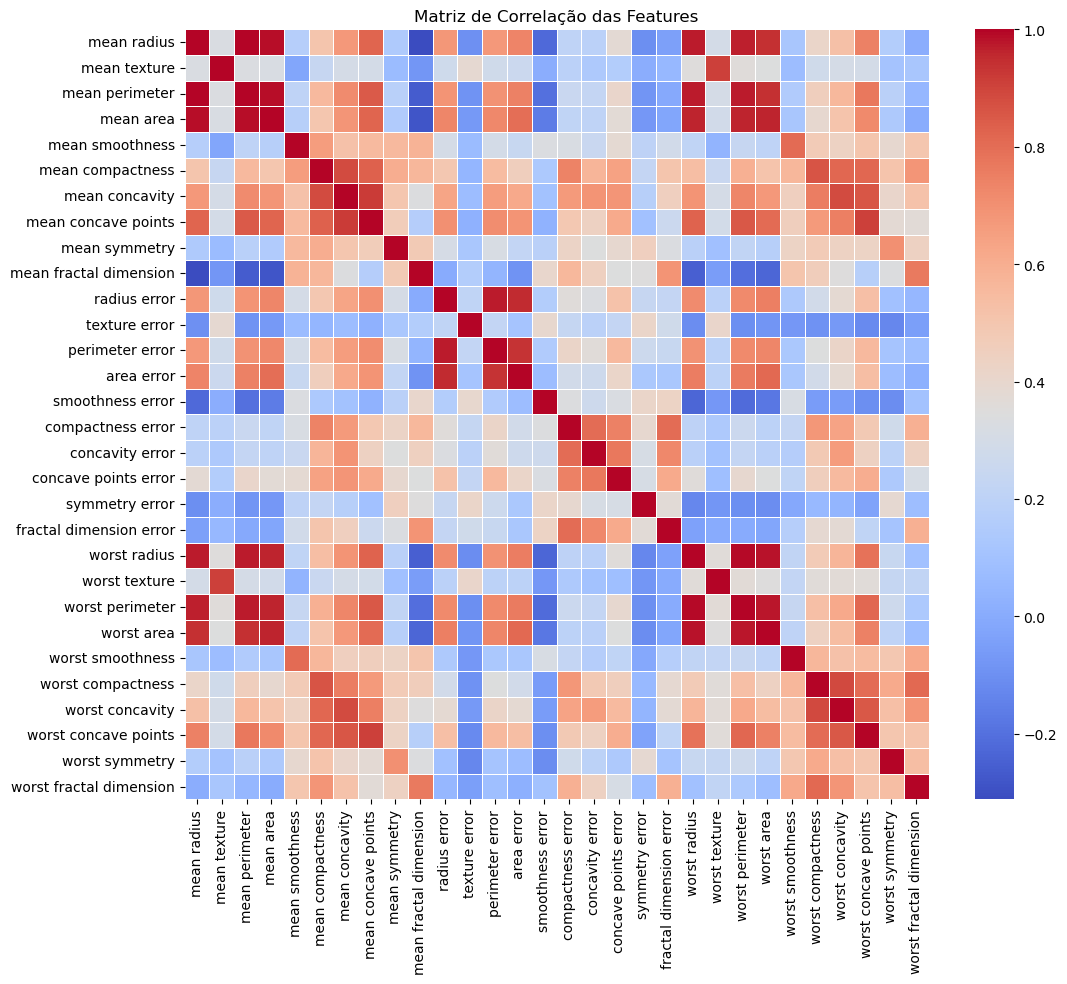

In [894]:
# Ver correlações
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('diagnosis', axis=1).corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação das Features")
plt.show()

# Machine Learning

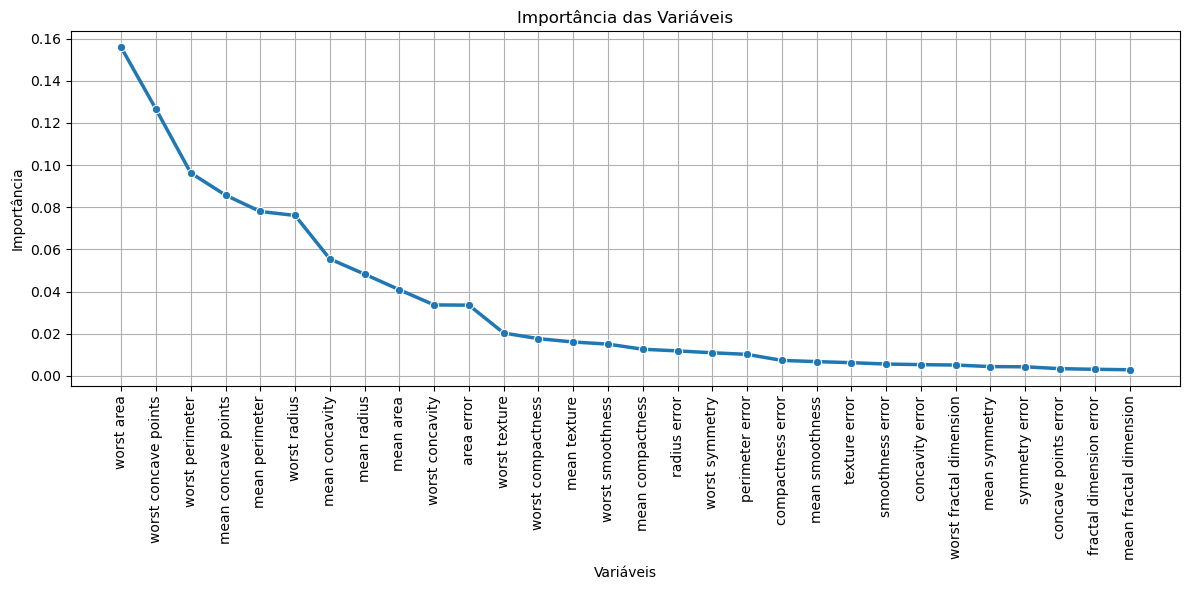

In [979]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=importances, marker='o', linewidth=2.5)
plt.xticks(rotation=90)
plt.title('Importância das Variáveis')
plt.ylabel('Importância')
plt.xlabel('Variáveis')
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

In [950]:
# Treinamento do modelo
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [952]:
# Previsões

y_pred = rf_model.predict(X_test)

In [973]:
# Classification Report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))

📄 Classification Report:
              precision    recall  f1-score   support

     Benigno       0.96      1.00      0.98        72
     Maligno       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [975]:
# AUC-ROC Score e Curva ROC
auc_score = roc_auc_score(y_test, y_proba)
print(f"🔬 AUC-ROC Score: {auc_score:.4f}")

🔬 AUC-ROC Score: 0.9965


# Otimização de Hiper-parâmetros

In [941]:
# Grade de parâmetros a testar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# GridSearch com validação cruzada
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1,
                           verbose=1)

# Ajuste
grid_search.fit(X_train, y_train)

# Melhor modelo
best_rf_model = grid_search.best_estimator_

# Previsões com o modelo otimizado
y_pred_optimized = best_rf_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


# Matrix de Confusão

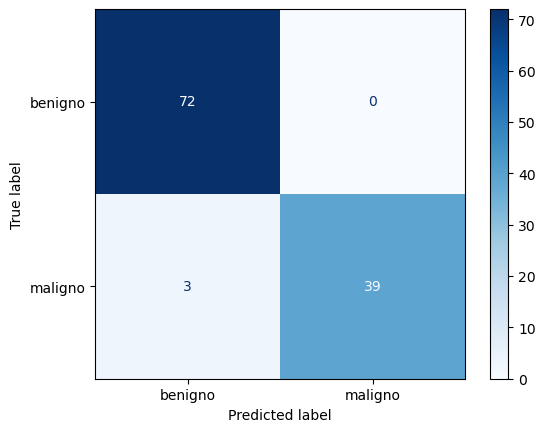

In [939]:
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")

In [969]:
train_pred = best_rf_model.predict(X_train)
test_pred = best_rf_model.predict(X_test)

print("Acurácia treino:", accuracy_score(y_train, train_pred))
print("Acurácia teste:", accuracy_score(y_test, test_pred))

Acurácia treino: 1.0
Acurácia teste: 0.9649122807017544


# Validação Cruzada Final (K-Fold)

In [967]:
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1_macro')
print("F1-macro médio (validação cruzada):", scores.mean())

F1-macro médio (validação cruzada): 0.9573666557358335
